# Bias Variance Tradeoff

There are few topics in Machine Learning that get more attention than the Bias Vs Variance topic because it is very important to understand. Knowing the basics will help guide the intelligence creation of models and help set expectations accordingly. Lots of people blindly create models only to find that they don't generalize well to new data and wonder why. While we can work with the data in terms of cross validation and feature engineering, unless the data has been cleaned and processed accordingly then even the training model might not experience good performance. 

## The Hidden Distribution

Think of any dataset as emerging from a distribution that conforms to some known behavior - like a multi-variable function. In such a case, we can then make lots of assumptions about the data we have since we know how it was generated. But that is rarely the case even in simple datasets with only a handful of features. What we are trying to do when making a model is estimate that "unknowable" function using whatever data we have at hand in that moment. In effect what we have is a sample of a large population which we hope can be used to better understand that larger pool of information. 

## The Noise

So much of data we get has measured information which has been generated or recorded imperfectly. Think of a public health facility which serves the interest of a large community. There can be wide variance in, for example, how workers in a public health center take vital information. This could be due to:

  - fatigue due to over work
  - non-existent or inconsistent training
  - non-compliant patience
  - faulty equipment
  - transcription errors from previous record entries

However, someone wanting to do some analysis on this information will still want this data because it's probably the best that anyone is going to get. Especially if you want to do some analysis on a public health issue impacting the entire community including those without medical insurance. 

The point here is that what we get in terms of data almost always contains "noise" in it that we might not be able to detect at least immedidately and many times never. But analysts will still happily use this information to feed the creation of models which can unintentionally learn the noise along with the "good stuff" commonly known as the "signal". The challenge then becomes to distinguish between the signal and the noise where possible. 

## Simple Is Good

When trying to understand a situation or resolve a problem, people many times consult others for opinions and ideas to get a larger perspective on things before making a decision. Some people do not because they have already made up their opinion. It could be said that these people are biased. That is, they have already made a decision and are sticking to it under the assumption that they understand the problem and associated variables well enough to do this. Or, maybe they don't even care about the situation or problem at hand and have adopted a general rule of thumb approach that, in the past, has served them well. In this case we could say that this approach deviates from reality in a significant way but not to the extent cause that person harm. So their position towards new situatiosn will likely be the same so there are few surprises. 

Why are they like this ? Maybe they learned from a small number of highly specialized situations that they have now confused as being representative of reality. The bias might be applicable to situations simialr to those they have previosuly seen but maybe not generally usable at large. So the general applicabilty is not so good. 

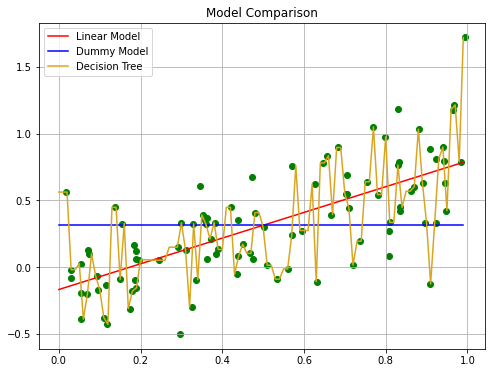

In [260]:
# Derived from https://daviddalpiaz.github.io/r4sl/simulating-the-biasvariance-tradeoff.html
# 

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Set up a function that represents a population
def f(x):
    return(x**2)

# Generate a dataframe with two columns x and y
# where x comes from the uniform distribution 
# and y is the square of the x value

def get_sim_data(f,sample_size=100):
    from numpy.random import uniform, normal
    import pandas as pd
    
    x = uniform(0,1,sample_size)
    y = f(x) + normal(0,0.3,sample_size)
    sim = pd.DataFrame({'x':x,'y':y})
    return(sim)

# Generate some simulated data
sim_data = get_sim_data(f,100)

# Get the X and y from the sim data
sim_vals = sim_data.values
X = sim_vals[:,0]
y = sim_vals[:,1]

# Fit a Linear Model
lmreg = LinearRegression()
lmreg.fit(X.reshape(-1,1),y)

# Fit a Dummy Model 
dreg = DummyRegressor(strategy="mean")
dreg.fit(X,y)

# Fit a Decision Tree
dtree = DecisionTreeRegressor()
dtree.fit(X.reshape(-1,1),y)

# Setup a common X grid for all models
grid = np.arange(0,1,.01)

# Now make predictions using the grid values
grid_lm_preds    = lmreg.predict(grid.reshape(-1,1))
grid_dum_preds   = dreg.predict(grid)
grid_dtree_preds = dtree.predict(grid.reshape(-1,1))

# Plot these predictions
plt.figure(figsize=(8,6))
plt.plot(grid,grid_lm_preds,'red') 
plt.plot(grid,grid_dum_preds,'b')
plt.plot(grid,grid_dtree_preds,'goldenrod')
plt.scatter(X,y,c="green")
plt.legend(['Linear Model','Dummy Model','Decision Tree'])
plt.title("Model Comparison")
#plt.plot(x0,f(x0),'rX',markersize=24,c="black")
plt.grid()

We will now use simulation to estimate the bias, variance, and mean squared error for the estimates for  
f(x) given the dummy and dection tree models at the point x0=0.95. We use simulation to complete this task, as performing the exact calculations are always difficult, and often impossible.

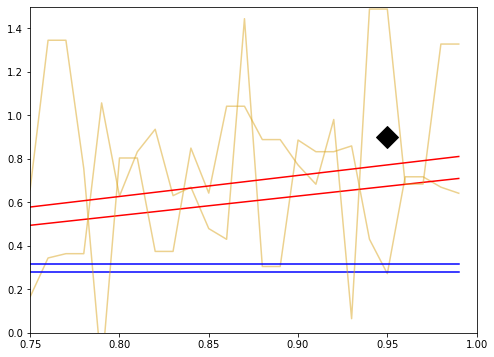

In [268]:
# Setup the number of simulations and the number of models
# We will be evaluating bias, rmse, and variance at a specific point x0 = 0.95
n_sims = 2
n_models = 3
x0 = 0.95

# Setup an array of zeroes to receive the predictions made 
# during the simulation
predictions = np.zeros((n_sims,n_models))

# Plot a blank slate to contain the results of the
# simulation

plt.figure(figsize=(8,6))
plt.xlim(0.75, 1)
plt.ylim(0,1.5)
plt.plot(X,y,c="white")    

# for each loop, generate a new data set
for i in range(n_sims):
    
    # generate a new dataset
    sim_data = get_sim_data(f, sample_size = 100)
    
    # Extract the X and y vals
    sim_vals = sim_data.values
    X = sim_vals[:,0]
    y = sim_vals[:,1]
    
    # fit the decision tree
    fit_1 = dtree.fit(X.reshape(-1,1),y)
    fit_1_preds = fit_1.predict(grid.reshape(-1,1))
    plt.plot(grid,fit_1_preds,c='goldenrod',alpha=0.5)
    
    # fit the dummy model
    fit_2 = dreg.fit(X,y)
    fit_2_preds = fit_2.predict(grid)
    plt.plot(grid,fit_2_preds,c='blue')
    
    # fit the regression model
    fit_3 = lmreg.fit(X.reshape(-1,1),y)
    fit_3_preds = fit_3.predict(grid.reshape(-1,1))
    plt.plot(grid,fit_3_preds,c='red')
    
    # Stash the point prediction into the predictions matrix
    predictions[i,0] = fit_1.predict(np.array(.95).reshape(1,-1))
    predictions[i,1] = fit_2.predict(np.array(.95).reshape(1,-1))
    predictions[i,2] = fit_3.predict(np.array(.95).reshape(1,-1))

# Plot the x0 on the graph
plt.plot(x0,f(x0),'rD',markersize=16,c="black")


To evaluate the bias and variance, we simulate values for the response y at x0 = 0.95 according to the true model.

In [269]:
# Here were simulate some noise that is part of the error
eps = np.random.normal(0,.3,n_sims)
y0 = f(x0) + eps
y0[0:5]

array([0.84172   , 1.12587208])

In [270]:
# Define some functions to get the bias and MSE
def get_bias(estimate, truth):
    import numpy as np
    return((np.mean(estimate)-truth)**2)

def get_mse(estimate, truth):
    return(np.mean((estimate-truth)**2))


In [271]:
# Apply the above functions to each column of the predictions matrix
bias = [ get_bias(predictions[:,i],f(x0))  for i in range(predictions.shape[1])]
mse  = [ get_mse(predictions[:,i],y0)  for i in range(predictions.shape[1])]

# Get the variance - np has such a function already
variance = [ np.var(predictions[:,i]) for i in range(predictions.shape[1])]

# Create a data frame so we can compare the Bias, MSE, and Variance across models
final = pd.DataFrame((bias,mse,variance),columns=["decison_tree","dummy","regression"])
final.index = ['bias','mse','variance']

In [253]:
final.T

,bias,mse,variance
decison_tree,0.003025,0.127987,0.056517
dummy,0.311623,0.482966,0.001924
regression,0.010698,0.095922,0.002868


A number of things to notice here:

1) We use squared bias in this table. Since bias can be positive or negative, squared bias is more useful for observing the trend as complexity increases.

2) The squared bias trend which we see here is decreasing bias as complexity increases, which we expect to see in general.

3) The exact opposite is true of variance. As model complexity increases, variance increases.

4) The mean squared error, which is a function of the bias and variance, is a result of the bias-variance tradeoff. We can decrease bias, by increasing variance. Or, we can decrease variance by increasing bias. By striking the correct balance, we can find a good mean squared error.